## predicting heart disease using machine learning 
 This notebook look nto using various python-based machine learning and data science libraries learning model capable of predicting whether or not someone has heart disease based on their medical attributes

 ## 1. Problem difinition 
 In a statement 
 

In [4]:
# Import all the tools we need
# Regular EDA plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score



In [5]:
df = pd.read_csv("C:/Users/rajne/OneDrive/Documents/mlprojects/heart-disease-project/heart-disease.csv")
df.shape

(303, 14)

## Data exploration (exploratory data analysis or EDA)
The goal here is to find oour more about the data and become a subject matter export on the dataset you're workking with

1. What question are you trying to solve 
2. what kind of data do we have and how do we treatt different types?
3 what's missing from the data and how to deal with it where are the outliers why shuold you care about them
4. how can you add or change or removw features to get more data 

In [6]:
df.tail(2)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df["target"].value_counts()


target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

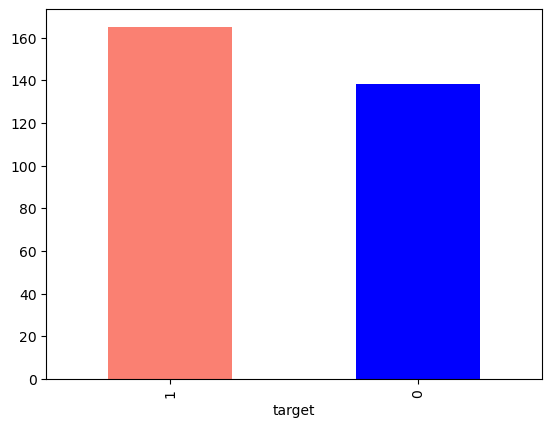

In [8]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "blue"])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [12]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
## Compare target columns with sex column 
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

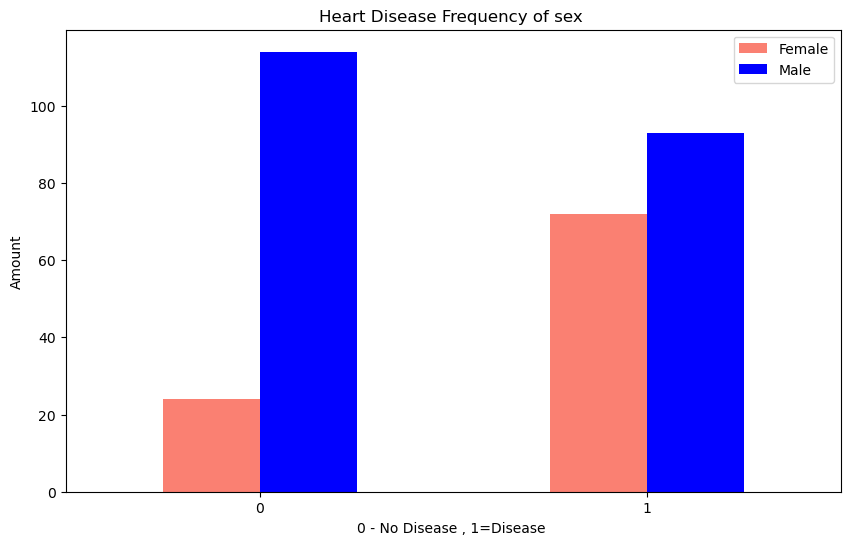

In [14]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["salmon", "blue"])
## 0 dont have heart disease and they are male 
plt.title("Heart Disease Frequency of sex ")
plt.xlabel("0 - No Disease , 1=Disease ")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

In [15]:
df.head()
        

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

### AGE VS MAX Heart Rate for Heart DIseae

In [17]:
# creating a another figure 

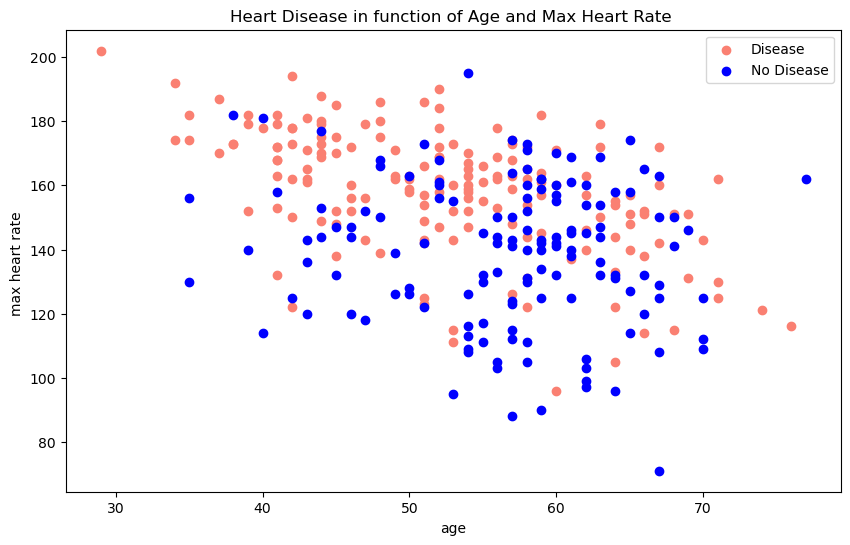

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], color="salmon")

## scatter iwth negative examples 
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color="blue")

## ADD some helpful info 
plt.title("Heart Disease in function of Age and Max Heart Rate ")
plt.xlabel("age")
plt.ylabel("max heart rate ")
plt.legend(["Disease","No Disease"])

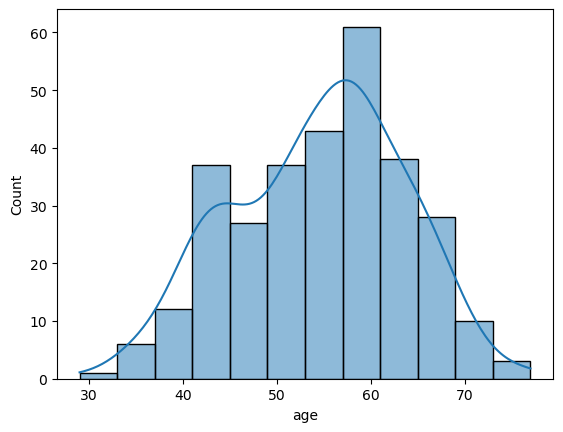

In [19]:
# check the distribuition of the age column with a histogram 
sns.histplot(df['age'], kde=True)
plt.show()


### Heart Disease Frequency  per chest pain 
o typical angina
1 atypical angina
2 non anginal 
3 asymtomatic 

In [20]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


### Make the crosstab more visual 

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

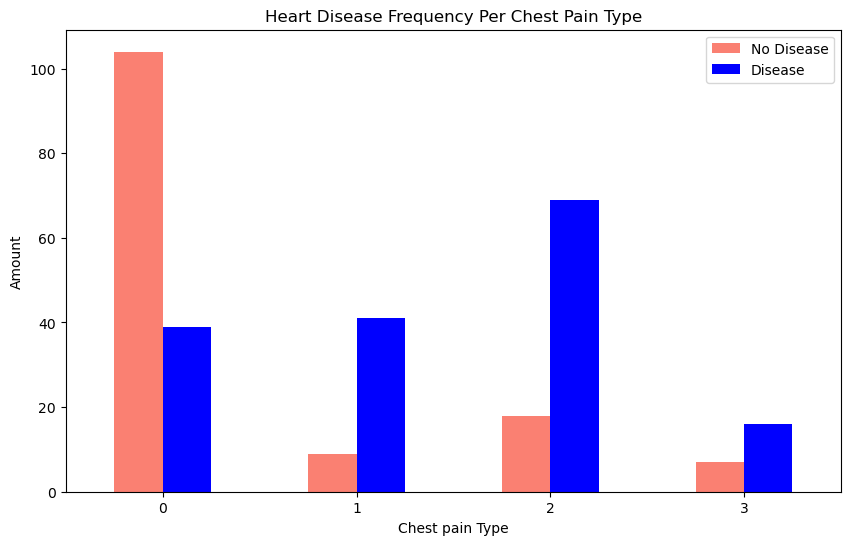

In [21]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6), color=["salmon", "blue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)


In [22]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
## building the correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


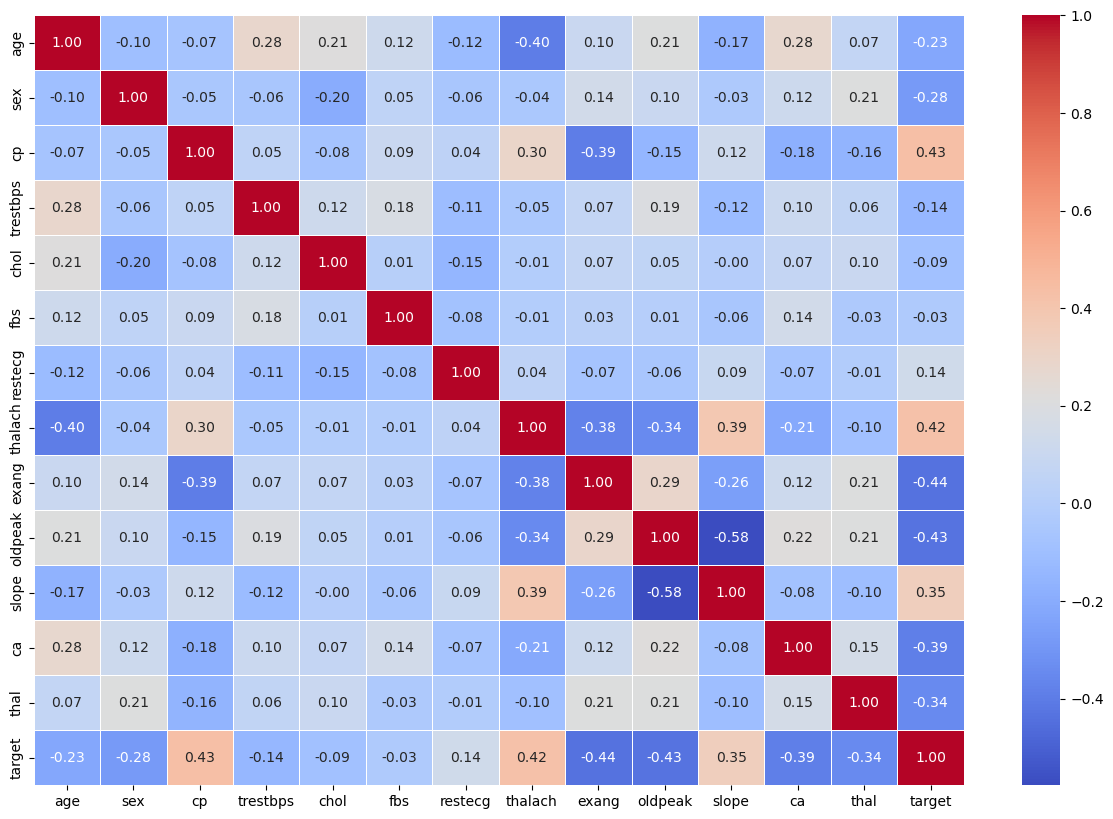

In [24]:
corr_matrix = df.corr()  
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt=".2f",
                 cmap='coolwarm')

### Modelling

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
## Split data into x and y 
X = df.drop("target",axis=1)
y=df["target"]

In [27]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [28]:
## split data into train and test sets 
np.random.seed(42)

# split inot trand & ttest set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [30]:
y_train , len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

### we are going to use three different machine learning models 
1. k nearest neighbor
2. logistic regression 
3. Random forest classifier


In [31]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and scores multiple models on the given training and testing data.

    Args:
        models: A dictionary of models to be fitted and scored.
        X_train: The training features.
        X_test: The testing features.
        y_train: The training labels.
        y_test: The testing labels.

    Returns:
        A DataFrame containing the model names, training and testing scores.
    """
    np.random.seed(42)
    
    # Create a dictionary to keep model scores
    model_scores = {}

    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score
        model_scores[name] = model.score(X_test, y_test)

    # Return the model scores
    return model_scores


In [32]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test
                            )
model_scores

C:\Users\rajne\miniconda3\envs\heart-disease-project\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## MOdel comparison


<Axes: >

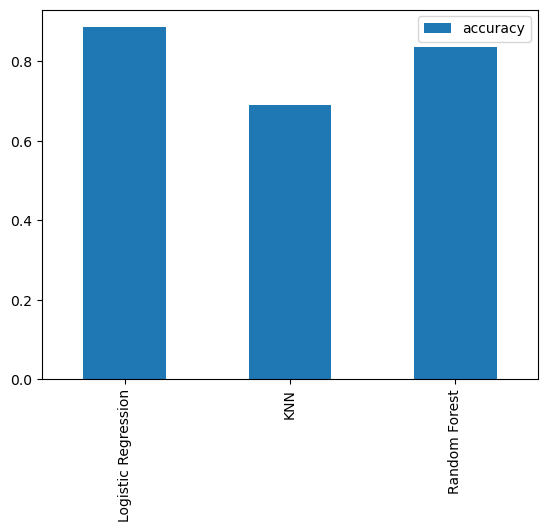

In [33]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])  # Create DataFrame with model scores
model_compare.T.plot.bar()  # Transpose and plot the bar chart

## Lets look at the following
* Hypyterparameter tuning
* Feature importance 
* Confusion matrix
* Cross Validation 
* Precision 
* Recall 
* F1 Score 
* Classification Report 
* Roc Curve
* Area under the curve (AUC)


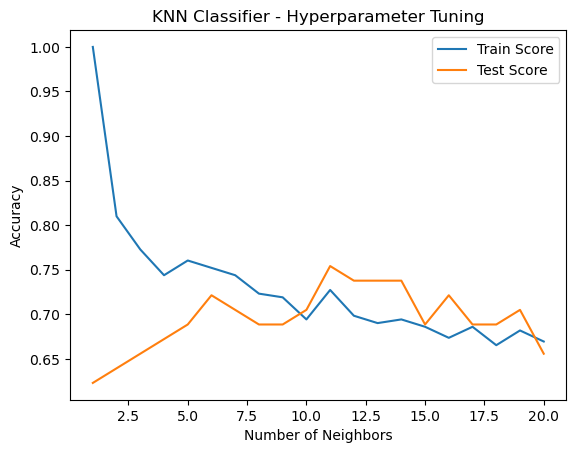

In [34]:
train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1, 21)

# setup KNN instance
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)  # set the number of neighbors
    knn.fit(X_train, y_train)  # fit the model on training data
    train_scores.append(knn.score(X_train, y_train))  # append training score
    test_scores.append(knn.score(X_test, y_test))  # append test score

# Optionally, you can visualize the results
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.title('KNN Classifier - Hyperparameter Tuning')
plt.show()


In [35]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

## HyperParameter tuning with Randomized SearchCV


In [36]:
# Create a hyperparameter grid for logistic regression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),  # Regularization parameter (C)
    "solver": ['liblinear']  # Solver type
}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),  # Number of trees in the forest
    "max_depth": [None, 3, 5, 10],  # Maximum depth of the tree
    "min_samples_split": np.arange(2, 20, 2),  # Minimum number of samples required to split an internal node
    "min_samples_leaf": np.arange(1, 20, 2)  # Minimum number of samples required to be at a leaf node
}


In [37]:
# Tune logistic regression using RandomizedSearchCV
np.random.seed(42)

# Define RandomizedSearchCV for Logistic Regression
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=log_reg_grid,  # Corrected name of the parameter
    cv=5,                               # 5-fold cross-validation
    n_iter=20,                          # Number of iterations for the search
    verbose=True,                       # To print progress
    random_state=42                     # Ensure reproducibility
)

# Fit the RandomizedSearchCV model
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   random_state=42, verbose=True)

In [38]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [ ]:
# Tune RandomForestClassifier using RandomizedSearchCV
np.random.seed(42)

# Define RandomizedSearchCV for RandomForestClassifier
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rf_grid,  # Parameter grid for RandomForestClassifier
    cv=5,                         # 5-fold cross-validation
    n_iter=20,                    # Number of iterations for the search
    verbose=True,                 # To print progress
    random_state=42               # Ensure reproducibility
)

# Fit the RandomizedSearchCV model
rs_rf.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
rs_rf.score(X_test,y_test)


## Hyper parameters tuning wit grid search cv 
snicee our logistic regression model provides the best scores so far we will try and improve them again using gridsearchcv

In [ ]:
from sklearn.model_selection import GridSearchCV

# Tune logistic regression using GridSearchCV
np.random.seed(42)

# Define the parameter grid for Logistic Regression
log_reg_grid = {
    "C": np.logspace(-4, 4, 30),  # Regularization parameter (C)
    "solver": ['liblinear']  # Solver type
}

# Define GridSearchCV for Logistic Regression
gs_log_reg = GridSearchCV(
    LogisticRegression(),
    param_grid=log_reg_grid,  # Parameter grid for GridSearchCV
    cv=5,                     # 5-fold cross-validation
    verbose=True,             # To print progress
)

# Fit the GridSearchCV model
gs_log_reg.fit(X_train, y_train)

# Print the best hyperparameters and best score
print(f"Best hyperparameters: {gs_log_reg.best_params_}")
print(f"Best score: {gs_log_reg.best_score_}")


In [ ]:
gs_log_reg.score(X_test,y_test)

## evaluation our tuned machine learnging classifier , beyond accuracy

* ROC curve and auc score
* confusion matrix 
* Precision 
* Recall
* F1-score

In [ ]:
# make predictions with tune model 
y_preds = gs_log_reg.predict(X_test)


In [ ]:
y_preds

In [ ]:
print(classification_report(y_test, y_predis))

In [ ]:
# calculate best hyperparameters 

In [ ]:
gs_log_reg.best_params_

In [ ]:
clf = LogisticRegression(
    C=0.20433597178569418,
    solver="liblinear"  # Correct solver parameter
)


In [ ]:
# cross validated accuracy 
cv_acc = cross_val_score(
    clf,               # Your LogisticRegression model
    X,                 # Features
    y,                 # Target
    cv=5,              # Number of folds (5-fold cross-validation)
    scoring="accuracy" # Metric to evaluate
)
cv_acc

In [ ]:
# cross calidted recall 
cv_acc = np.mean(cv_acc)
cv_acc


In [ ]:
# Cross-validated precision
cv_precision = cross_val_score(
    clf,               # Your classification model (e.g., LogisticRegression)
    X,                 # Features
    y,                 # Target
    cv=5,              # Number of folds
    scoring="precision"  # Evaluation metric is precision
)

# Print individual fold precisions
print("Cross-validation precision scores:", cv_precision)

# Print mean and standard deviation of precisions
print("Mean CV precision: {:.2f} (+/- {:.2f})".format(
    cv_precision.mean(), 
    cv_precision.std() * 2
))

In [ ]:
cv_recall = cross_val_score(
    clf,               # Trained LogisticRegression model
    X,                 # Feature data
    y,                 # Target data
    cv=5,              # Number of cross-validation folds
    scoring="recall"   # Metric to compute recall
)

# Output the cross-validated recalls
print("Cross-validated recalls for each fold:", cv_recall)

# Mean recall across all folds
print("Mean cross-validated recall:", cv_recall.mean())

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for F1-score
cv_f1 = cross_val_score(
    clf,               # Trained LogisticRegression model
    X,                 # Feature data
    y,                 # Target data
    cv=5,              # Number of cross-validation folds
    scoring="f1"       # Metric to compute F1-score
)

# Output the cross-validated F1-scores
print("Cross-validated F1-scores for each fold:", cv_f1)

# Mean F1-score across all folds
print("Mean cross-validated F1-score:", cv_f1.mean())


In [ ]:
# visualize cross validated metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
cv_results = {}

for metric in scoring_metrics:
    cv_results[metric] = cross_val_score(
        clf, X, y, cv=5, scoring=metric
    )
cv_df = pd.DataFrame(cv_results)

# Plot cross-validated metrics
plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_df)
plt.title("Cross-Validated Metrics")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.show()

# Display mean scores
mean_scores = cv_df.mean()
print("Mean Cross-Validated Scores:")
print(mean_scores)

In [ ]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")
clf.fit(X_train , y_train);



In [ ]:
clf.coef_

In [ ]:
df.head()

In [ ]:
feature_dict = dict(zip(df.columns , list(clf.coef_[0])))
feature_dict

In [ ]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(
    figsize=(10, 6),
    legend=False,
    title="Feature Importance",
    color="skyblue"
)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [2]:
pd.crosstab(df["sex"],df["target"])


NameError: name 'pd' is not defined

In [1]:
# Example: Test on single input data
new_data = {
    "age": [60],
    "sex": [0],
    "cp": [3],
    "trestbps": [145],
    "chol": [233],
    "fbs": [1],
    "restecg": [0],
    "thalach": [150],
    "exang": [0],
    "oldpeak": [2.3],
    "slope": [0],
    "ca": [0],
    "thal": [1]
}

new_data_df = pd.DataFrame(new_data)

# Test with Logistic Regression
predicted_class = rs_log_reg.best_estimator_.predict(new_data_df)
predicted_probability = rs_log_reg.best_estimator_.predict_proba(new_data_df)

print("Logistic Regression Prediction:", predicted_class[0])
print("Probability:", predicted_probability[0])


NameError: name 'pd' is not defined